<a href="https://colab.research.google.com/github/hyeonniii/NLP/blob/main/_11_%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81(Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 텍스트 마이닝 기법 중에서 가장 많이 활용되는 기법 중 하나
* 대표 토픽 모델링 방법으로 잠재 의미 분석(Latent Semantic Analysis)과 잠재 디리클레 할당(Latent Dirichlet Allocation) 기법이 있음

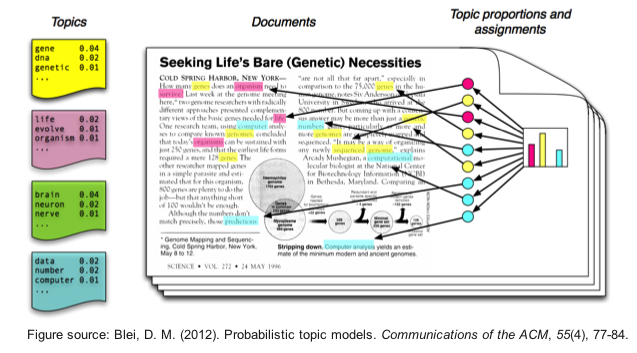

* Gensim: 벡터 변환, 토픽 모델링, 텍스트 요약 등 자연어와 텍스트마이닝 관련 여러 기능을 제공하고 있는 라이브러리

In [15]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 뉴스그룹 데이터 준비

In [16]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=123,remove=('headers','footers','quotes'))
print(len(dataset.data))
print(dataset.target_names)
dataset.data[1]

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


'From article <1993Apr18.000152.2339@gnv.ifas.ufl.edu>, by jrm@gnv.ifas.ufl.edu:\n\nOnly irrational fools such as yourself are set against RKBA.  There are\n*plenty* of people who support it.\n\n\nThe government will be overthrown *long* before that happens.  A *huge* \nmillitia composed of all available men and women who care about their\ncountry will defeat the forces of the evil Klintonistas.  The people\n*will* prevail!\n\nOh, so you think armed citizens alone can\'t overthrow the government?\nConsider this:  do you think *all* law enforcement officials and members\nof the Armed Forces will turn against the people that they are entrusted\nto serve?  Not hardly.  You can count on a lot of people in the Army,\nMarines, Air Force, Navy, National Guard, police officers, and so on\njoining in the cause to defend the liberties and freedoms of American\ncitizens.  COUNT ON IT!  THE GOVERNMENT WILL NOT BE ABLE TO DISARM\nEVERYONE WITHOUT STARTING A CIVIL WAR!\n\n\nWrong again.  People will

In [17]:
import pandas as pd
news_df = pd.DataFrame({'article':dataset.data})
print(len(news_df))
news_df.replace("",float("NaN"),inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11314
11096


In [18]:
import re
import nltk
import string
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string
nltk.download('stopwords')

def clean_text(d):
  d=str(d).lower()
  d=re.sub('\[.*?\]','',d)
  d=re.sub('<.*?>+','',d)
  d=re.sub('[%s]' % re.escape(string.punctuation),'',d)
  d=re.sub('\n',"",d)
  d=re.sub('\w*\d\w*','',d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')+['u','im','c']
  return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words])

def preprocessing(d):
  return preprocess_string(d)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
news_df['article']

0        A quick query for Powerbook gurus:\nTom Spearm...
1        From article <1993Apr18.000152.2339@gnv.ifas.u...
2        \nSteve, take a look at what you are saying.  ...
3        I have a routine that changes the color (RGB) ...
4        \nI sometimes wonder if Kekule's dream wasn't ...
                               ...                        
11309    \n\ni would like to remind my jewish colleague...
11310    \nProbably because everyone (that is, everyone...
11311    THere is a defect in the 13" hi-res monitors, ...
11312    \na lot of batters lean in when pitches come. ...
11313    Howdy,\n\nI'm a little new to this newsgroup, ...
Name: article, Length: 11096, dtype: object

In [20]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        a quick query for powerbook gurustom spearman ...
1        from article  by jrmgnvifasufleduonly irration...
2        steve take a look at what you are saying  i do...
3        i have a routine that changes the color rgb at...
4        i sometimes wonder if kekules dream wasnt just...
                               ...                        
11309    i would like to remind my jewish colleague mzm...
11310    probably because everyone that is everyone who...
11311    there is a defect in the  hires monitors bring...
11312    a lot of batters lean in when pitches come  ri...
11313    howdyim a little new to this newsgroup but i w...
Name: article, Length: 11096, dtype: object

In [21]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        quick query powerbook gurustom spearman post a...
1        article jrmgnvifasufleduonly irrational fools ...
2        steve take look saying dont see one construvti...
3        routine changes color rgb attributes myvga ada...
4        sometimes wonder kekules dream wasnt wee bit i...
                               ...                        
11309    would like remind jewish colleague mzm much th...
11310    probably everyone everyone cable watchevery br...
11311    defect hires monitors bring dealer replace fly...
11312    lot batters lean pitches come rickeys crouch t...
11313    howdyim little new newsgroup would like tap th...
Name: article, Length: 11096, dtype: object

In [22]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news[1]

['articl',
 'jrmgnvifasufleduonli',
 'irrat',
 'fool',
 'set',
 'rkba',
 'areplenti',
 'peopl',
 'support',
 'itth',
 'govern',
 'overthrown',
 'long',
 'happen',
 'huge',
 'millitia',
 'compos',
 'avail',
 'men',
 'women',
 'care',
 'theircountri',
 'defeat',
 'forc',
 'evil',
 'klintonista',
 'peoplewil',
 'prevailoh',
 'think',
 'arm',
 'citizen',
 'overthrow',
 'governmentconsid',
 'think',
 'law',
 'enforc',
 'offici',
 'membersof',
 'arm',
 'forc',
 'turn',
 'peopl',
 'entrustedto',
 'serv',
 'hardli',
 'count',
 'lot',
 'peopl',
 'armymarin',
 'air',
 'forc',
 'navi',
 'nation',
 'guard',
 'polic',
 'offic',
 'onjoin',
 'caus',
 'defend',
 'liberti',
 'freedom',
 'americancitizen',
 'count',
 'govern',
 'abl',
 'disarmeveryon',
 'start',
 'civil',
 'warwrong',
 'peopl',
 'hide',
 'gun',
 'officersmor',
 'like',
 'jackboot',
 'stormtroop',
 'abl',
 'themthei',
 'idiot',
 'realiz',
 'dontthen',
 'includ',
 'believ',
 'describehappen',
 'come',
 'gun',
 'disarm',
 'citizenswould',


In [23]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(tokenized_news)
print(len(dictionary))

dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print(len(dictionary))

corpus = [dictionary.doc2bow(text) for text in tokenized_news]
print(len(corpus))

123847
2000
11096


## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정
* LSA는 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

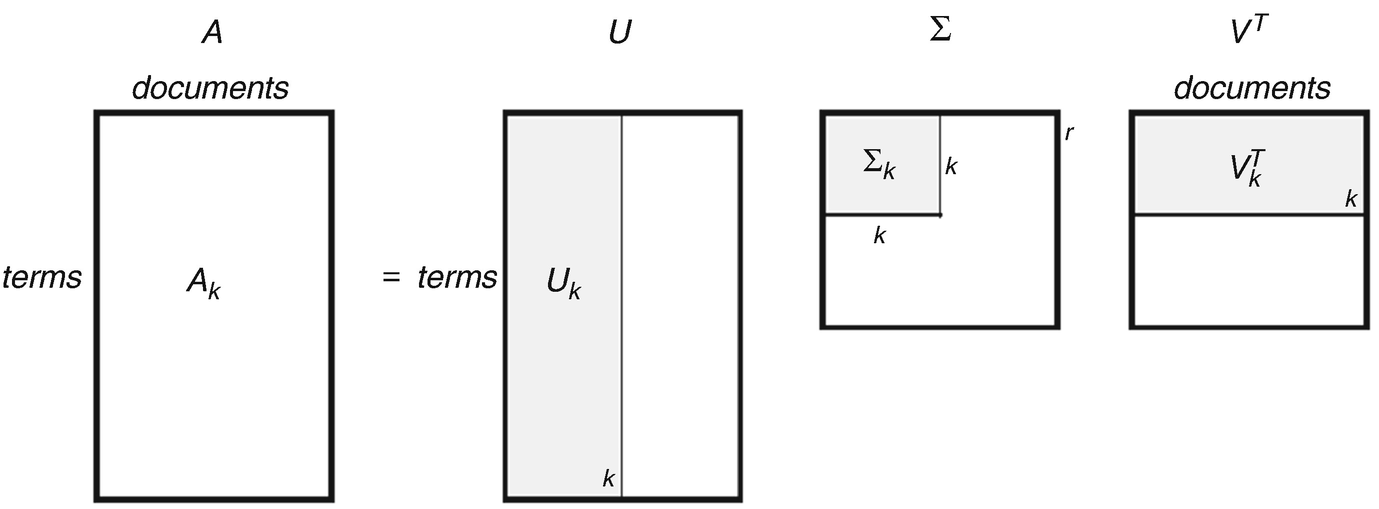

<small>Anandarajan, M., Hill, C., Nolan, T. (2019). Semantic Space Representation and Latent Semantic Analysis. In: Practical Text Analytics. Advances in Analytics and Data Science, vol 2. Springer, Cham. https://doi.org/10.1007/978-3-319-95663-3_6</small>

## 잠재 의미 분석을 위한 `LsiModel`

In [24]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus,num_topics=10,id2word=dictionary)
lsi_model.print_topics(num_words=10)

[(0,
  '0.230*"file" + 0.224*"us" + 0.179*"program" + 0.143*"imag" + 0.138*"peopl" + 0.128*"avail" + 0.122*"new" + 0.122*"dont" + 0.122*"work" + 0.121*"anonym"'),
 (1,
  '0.255*"file" + -0.229*"know" + -0.227*"peopl" + -0.220*"said" + 0.193*"imag" + -0.184*"dont" + -0.171*"think" + -0.141*"go" + -0.138*"didnt" + 0.137*"program"'),
 (2,
  '-0.679*"wire" + -0.264*"ground" + -0.209*"circuit" + -0.168*"connect" + -0.158*"us" + -0.153*"neutral" + -0.127*"cabl" + -0.119*"electr" + -0.117*"box" + -0.112*"instal"'),
 (3,
  '0.413*"anonym" + 0.229*"post" + 0.215*"internet" + -0.211*"entri" + -0.194*"imag" + -0.192*"file" + 0.190*"privaci" + -0.172*"program" + 0.151*"new" + 0.150*"servic"'),
 (4,
  '-0.468*"entri" + 0.317*"drive" + -0.291*"file" + 0.200*"disk" + 0.189*"imag" + 0.170*"support" + 0.135*"control" + 0.134*"data" + -0.133*"rule" + 0.132*"hard"'),
 (5,
  '0.244*"team" + 0.236*"hockei" + -0.228*"anonym" + 0.227*"drive" + 0.219*"new" + 0.204*"leagu" + 0.191*"game" + 0.159*"nhl" + 0.146*

* 응집도(Coherence)
  * 토픽이 얼마나 의미론적으로 일관성이 있는지 판단
  * 값이 높을수록 의미론적 일관성이 높음
  * 해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인
  * 다른 외부 데이터(Corpus, Thesaurus)를 이용해 평가 진행

In [27]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 5,15
coherence_scores=[]

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus,num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model, texts=tokenized_news, dictionary=dictionary,coherence='u_mass')
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[-1.968740787688014, -2.041370076194227, -2.2428372612199983, -2.504069277457081, -2.2780643755293983, -2.4996613985007565, -2.6139612996620905, -2.542273694486161, -2.56770967766362, -2.629447351036363]


<function matplotlib.pyplot.show>

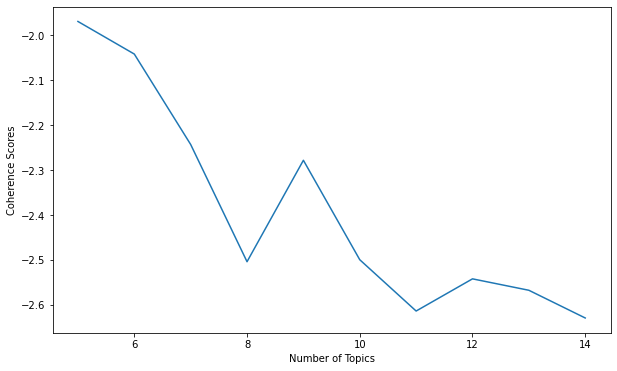

In [28]:
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show

In [29]:
lsi_model = LsiModel(corpus,num_topics = 6, id2word=dictionary)

lsi_model.print_topics(num_words=10)

[(0,
  '0.230*"file" + 0.224*"us" + 0.179*"program" + 0.143*"imag" + 0.138*"peopl" + 0.128*"avail" + 0.122*"new" + 0.122*"dont" + 0.122*"work" + 0.121*"anonym"'),
 (1,
  '0.255*"file" + -0.229*"know" + -0.227*"peopl" + -0.220*"said" + 0.193*"imag" + -0.184*"dont" + -0.171*"think" + -0.141*"go" + -0.138*"didnt" + 0.137*"program"'),
 (2,
  '0.679*"wire" + 0.264*"ground" + 0.209*"circuit" + 0.168*"connect" + 0.158*"us" + 0.153*"neutral" + 0.127*"cabl" + 0.119*"electr" + 0.117*"box" + 0.112*"instal"'),
 (3,
  '0.413*"anonym" + 0.229*"post" + 0.215*"internet" + -0.211*"entri" + -0.194*"imag" + -0.192*"file" + 0.190*"privaci" + -0.172*"program" + 0.151*"new" + 0.150*"servic"'),
 (4,
  '0.468*"entri" + -0.317*"drive" + 0.291*"file" + -0.200*"disk" + -0.189*"imag" + -0.170*"support" + -0.135*"control" + -0.134*"data" + 0.133*"rule" + -0.132*"hard"'),
 (5,
  '-0.244*"team" + -0.236*"hockei" + 0.228*"anonym" + -0.227*"drive" + -0.219*"new" + -0.204*"leagu" + -0.191*"game" + -0.159*"nhl" + -0.146

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 $w$가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$: 문서 $d$의 단어들 중 토픽 $t$에 해당하는 비율, 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    
* $p(w|t)$: 단어 w를 가지고 있는 모든 문서들 중  토픽 $t$가 할당된 비율, 다른 문서에서 단어 $w$에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

* 즉, LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽 추출

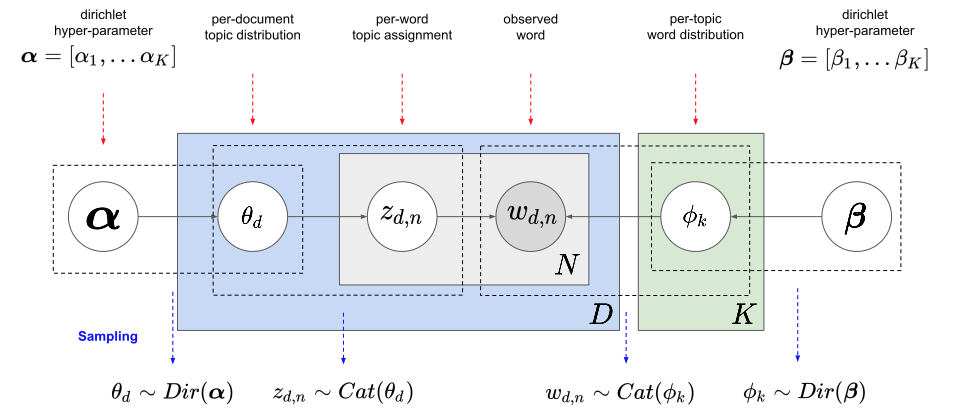

<small>그림 출처: https://donghwa-kim.github.io/lda.html</small>

* $K$: 토픽 수
* $D$: 문서 수
* $N$: 특정 문서의 단어 수
* $w_{d,n}$: 특정 문서 $d$에서 $n$번째 단어로 관측된 값
* $z_{d,n}$ topic: 특정 문서 $d$에서 $n$번째 단어에 대한 topic assignment
  * $z_{d,n}$는 Multinomial($\theta_d$)에서 샘플링 된 것($\theta_d$: Multinomial 분포의 모수)
  * Multinomial($\theta_d$)는 한번만 시행(샘플)된 것으로 Categorical($\theta_d$)와 동일
  * $\theta_d=[\theta_{d,1}, \theta_{d,2},..., \theta_{d,K}]∈\mathbb{R}^K$
  * $\sum_{k}\theta_{d, k}=1,\theta_{d, k} \geq 0$, ($k$: topic index)는 $d$번째 문서의 $Dirichlet_d$($\alpha$)에서 샘플링
  * $\alpha=[\alpha_1, \alpha_2, ..., \alpha_K]$, symmetry할 경우 $\alpha_1 = \alpha_2 =  ... = \alpha_K$
* $w_{d,n}$ word: 특정 문서 $d$에서 $n$번째 단어
  * $w_{d,n}$는 Multinomial($\beta_k$)에서 샘플링 된 것($\beta_k$: Multinomial 분포의 모수)
  * Multinomial($\phi_k$)는 한번만 시행(샘플)된 것으로 Categorical($\phi_k$)와 동일
  * $\phi_k=[\phi_{k,1},\phi_{k,2},..., \phi_{k,V}]∈\mathbb{R}^V$
  * $\sum_{i}\phi_{k, v}=1,\phi_{v, i} \geq 0$, ($v$: vocabulary index)는 $k$번째 문서의 $Dirichlet_k$($\beta$)에서 샘플링
  * $\beta=[\beta_1, \beta_2, ..., \beta_V]$, symmetry할 경우 $\beta_1 = \beta_2 =  ... = \beta_V$

## 잠재 디리클레 할당을 위한 `LdaModel`

In [30]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics = 10, id2word=dictionary)
lda_model.print_topics (num_words=10)

[(0,
  '0.014*"think" + 0.013*"christian" + 0.012*"believ" + 0.010*"know" + 0.009*"god" + 0.009*"mean" + 0.009*"peopl" + 0.008*"book" + 0.008*"dont" + 0.008*"like"'),
 (1,
  '0.011*"car" + 0.009*"new" + 0.008*"space" + 0.008*"us" + 0.008*"like" + 0.007*"engin" + 0.006*"good" + 0.006*"orbit" + 0.006*"year" + 0.006*"oil"'),
 (2,
  '0.017*"us" + 0.016*"file" + 0.014*"kei" + 0.010*"encrypt" + 0.009*"program" + 0.008*"chip" + 0.008*"data" + 0.007*"secur" + 0.007*"user" + 0.006*"inform"'),
 (3,
  '0.017*"armenian" + 0.016*"team" + 0.011*"new" + 0.011*"game" + 0.009*"player" + 0.009*"hockei" + 0.009*"plai" + 0.008*"year" + 0.008*"leagu" + 0.007*"season"'),
 (4,
  '0.011*"inform" + 0.011*"anonym" + 0.011*"address" + 0.010*"list" + 0.010*"avail" + 0.010*"program" + 0.010*"univers" + 0.009*"mail" + 0.009*"email" + 0.009*"internet"'),
 (5,
  '0.013*"peopl" + 0.009*"govern" + 0.009*"israel" + 0.007*"work" + 0.007*"like" + 0.007*"isra" + 0.007*"want" + 0.007*"right" + 0.006*"dont" + 0.006*"kill"'),

* 혼란도(Perplexity)
  * 의미 확률 모델이 결과를 얼마나 정확하게 예측하는지 판단하는 기준
  * 토픽 모델링 기법이 얼마나 빠르게 수렴하는지 확인 가능
  * 선정된 토픽 갯수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽 개수 선정 가능
  * 동일 모델 내에서 파라미터에 따라 성능 평가를 할 때 주로 사용
  * Perplexity가 낮다고 해서 결과 해석이 용이하다는 의미는 아님


In [31]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 5,15
perplexity_values = []
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model=LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
  perplexity_values.append(model.log_perplexity(corpus))
  coherence = CoherenceModel(model=model, texts=tokenized_news, dictionary=dictionary,coherence='u_mass')
  coherence_scores.append(coherence.get_coherence())

print(perplexity_values)
print(coherence_scores)

[-7.024249677365903, -6.995645050995626, -6.990020116012592, -6.952042649355488, -6.9853841897556945, -6.9833372974082755, -6.9731575658806895, -6.996930508393145, -6.984570596634678, -6.97969151913353]
[-1.879936716758251, -1.8612218252941206, -1.989810578274128, -1.8153206489706624, -2.0560422155072273, -2.1781153836431026, -1.900544893518276, -2.148431166005306, -2.2887538527277176, -2.281280211533381]


<function matplotlib.pyplot.show>

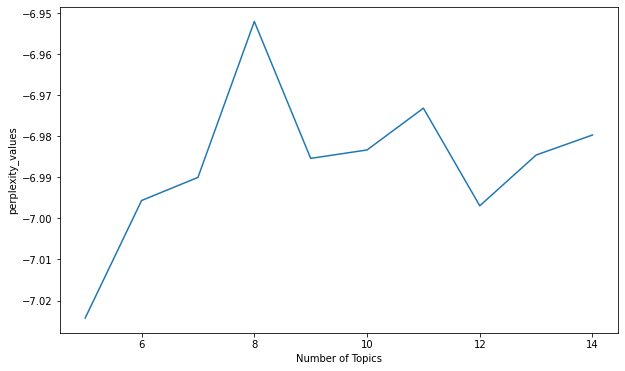

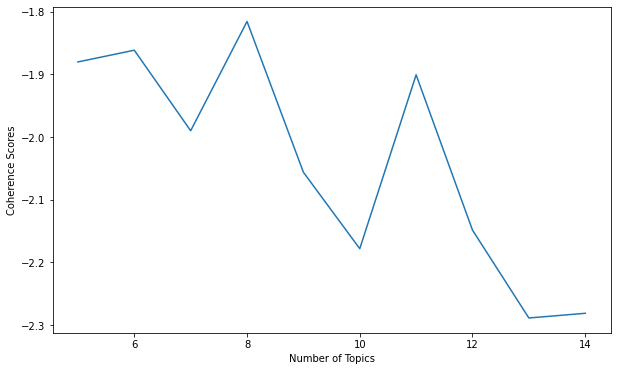

In [32]:
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x,perplexity_values)
plt.xlabel('Number of Topics')
plt.ylabel('perplexity_values') #낮은게 좋은
plt.show

plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores') #높은게 좋음
plt.show


In [33]:
lda_model = LdaModel (corpus, num_topics=13, id2word=dictionary)
topics= lda_model.print_topics(num_words=10)
print(topics)

cm=CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence=cm.get_coherence()
print('Coherence: ', coherence)
print('Perplexity: ', lda_model.log_perplexity(corpus))



[(0, '0.024*"kei" + 0.015*"law" + 0.011*"govern" + 0.009*"encrypt" + 0.009*"administr" + 0.006*"clipper" + 0.006*"secur" + 0.006*"gener" + 0.006*"chip" + 0.006*"enforc"'), (1, '0.023*"drive" + 0.015*"mac" + 0.013*"us" + 0.013*"email" + 0.012*"disk" + 0.010*"need" + 0.009*"scsi" + 0.009*"do" + 0.009*"like" + 0.009*"know"'), (2, '0.053*"armenian" + 0.022*"turkish" + 0.009*"massacr" + 0.009*"attack" + 0.009*"turkei" + 0.009*"turk" + 0.009*"nazi" + 0.009*"villag" + 0.008*"muslim" + 0.008*"histori"'), (3, '0.035*"god" + 0.016*"believ" + 0.012*"christian" + 0.010*"jesu" + 0.010*"peopl" + 0.009*"church" + 0.009*"exist" + 0.008*"son" + 0.008*"word" + 0.007*"bibl"'), (4, '0.013*"state" + 0.012*"presid" + 0.009*"new" + 0.009*"peopl" + 0.007*"year" + 0.007*"right" + 0.006*"tax" + 0.006*"american" + 0.005*"jew" + 0.005*"countri"'), (5, '0.012*"space" + 0.010*"data" + 0.010*"us" + 0.009*"chip" + 0.008*"new" + 0.007*"anonym" + 0.007*"technolog" + 0.006*"orbit" + 0.006*"secur" + 0.006*"inform"'), (6,

## LDA 시각화를 위한 `pyLDAvis`

In [34]:
!pip install -Uqq pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 11.8 MB/s 


In [36]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,corpus,dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


# 토픽 트렌드(Topic Trends)

* 시간에 따라 토픽의 변화 살펴보기
* 사이킷런(Scikit-learn)의 LDA를 이용한 토픽 모델링

## 뉴스 헤드라인 데이터 준비

* ABC 뉴스 헤드라인 (18년, 2003-02-19 ~ 2020-12-31)
* 뉴스 헤드라인 데이터: http://suanlab.com/datasets/abcnews-date-text.csv
* 출처: https://www.kaggle.com/therohk/million-headlines

In [37]:
!wget http://suanlab.com/datasets/abcnews-date-text.csv

--2022-08-09 07:17:49--  http://suanlab.com/datasets/abcnews-date-text.csv
Resolving suanlab.com (suanlab.com)... 52.219.146.29
Connecting to suanlab.com (suanlab.com)|52.219.146.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62726972 (60M) [text/csv]
Saving to: ‘abcnews-date-text.csv’

abcnews-date-text.c 100%[===================>]  59.82M  15.9MB/s    in 5.0s    

2022-08-09 07:17:54 (12.1 MB/s) - ‘abcnews-date-text.csv’ saved [62726972/62726972]



In [39]:
import pandas as pd

df = pd.read_csv('abcnews-date-text.csv')
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1226253,20201231,what abc readers learned from 2020 looking bac...
1226254,20201231,what are the south african and uk variants of ...
1226255,20201231,what victorias coronavirus restrictions mean f...
1226256,20201231,whats life like as an american doctor during c...


In [40]:
df_2020=df[df.publish_date>=20100101]
df_2020=df_2020.reset_index(drop=True)
df_2020

,publish_date,headline_text
0,20100101,12m degas stolen from museum
1,20100101,17 die in bangladesh bus crash
2,20100101,2010 to be drier after very wet 2009
3,20100101,37 catholic workers killed worldwide
4,20100101,600 hurt in philippine new year revelry
...,...,...
715948,20201231,what abc readers learned from 2020 looking bac...
715949,20201231,what are the south african and uk variants of ...
715950,20201231,what victorias coronavirus restrictions mean f...
715951,20201231,whats life like as an american doctor during c...


In [41]:
df_2020['headline_text'] = df_2020['headline_text'].apply(clean_stopword)
df_2020['headline_text'] = df_2020['headline_text'].apply(preprocessing)
tokenized_doc = df_2020['headline_text'].apply(lambda x: [word for word in x if len(word)>3])
tokenized_doc


0                                    [dega, stolen, museum]
1                                       [bangladesh, crash]
2                                                   [drier]
3                          [cathol, worker, kill, worldwid]
4                          [hurt, philippin, year, revelri]
                                ...                        
715948                          [reader, learn, look, year]
715949                     [south, african, variant, covid]
715950         [victoria, coronaviru, restrict, mean, year]
715951          [what, life, like, american, doctor, covid]
715952    [women, shed, canberra, reskil, unemploi, pandem]
Name: headline_text, Length: 715953, dtype: object

In [42]:
detokenized_headline = []
for i in range(len(df_2020)):
  t = ' '.join(tokenized_doc[i])
  detokenized_headline.append(t)

df_2020['headline_text'] = detokenized_headline
df_2020['headline_text']

0                                 dega stolen museum
1                                   bangladesh crash
2                                              drier
3                        cathol worker kill worldwid
4                        hurt philippin year revelri
                             ...                    
715948                        reader learn look year
715949                   south african variant covid
715950        victoria coronaviru restrict mean year
715951          what life like american doctor covid
715952    women shed canberra reskil unemploi pandem
Name: headline_text, Length: 715953, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features = 1000)
headline_cv = cv.fit_transform(df_2020['headline_text'])
print(headline_cv.shape)
f_names = cv.get_feature_names_out()
print(f_names)


(715953, 1000)
['abbott' 'aborigin' 'abus' 'access' 'accid' 'accus' 'action' 'activist'
 'adam' 'address' 'adelaid' 'admit' 'affect' 'afghan' 'afghanistan'
 'africa' 'agreement' 'agricultur' 'ahead' 'airport' 'alan' 'alcohol'
 'alert' 'alic' 'alleg' 'allegedli' 'allow' 'america' 'amid' 'analysi'
 'andrew' 'anger' 'anim' 'anniversari' 'announc' 'answer' 'anti' 'anzac'
 'apologis' 'appeal' 'appear' 'appl' 'appoint' 'approv' 'april' 'area'
 'armi' 'arrest' 'arriv' 'artist' 'asbesto' 'asia' 'asian' 'assault'
 'assist' 'asylum' 'attack' 'attempt' 'august' 'aussi' 'australia'
 'australian' 'author' 'avoid' 'awai' 'award' 'babi' 'bail' 'bali' 'bank'
 'barrier' 'base' 'bash' 'basin' 'battl' 'beach' 'beat' 'beef' 'begin'
 'bendigo' 'benefit' 'best' 'better' 'bike' 'biki' 'billion' 'bird'
 'bishop' 'black' 'blame' 'blast' 'blaze' 'block' 'blog' 'blow' 'blue'
 'board' 'boat' 'bodi' 'bomb' 'bomber' 'book' 'boom' 'boost' 'border'
 'boss' 'brawl' 'breach' 'break' 'breakfast' 'bridg' 'brief' 'bring'


In [44]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=7, n_jobs = -1, random_state = 123)
headline_topics = lda_model.fit_transform(headline_cv)

n_top_words = 20

for idx, topic in enumerate(lda_model.components_):
  print("Topic: ", idx)
  print([(f_names[i],topic[i].round) for i in topic.argsort()[:-n_top_words-1:-1]])

Topic:  0
[('sydnei', <built-in method round of numpy.float64 object at 0x7fd1c2f9d930>), ('warn', <built-in method round of numpy.float64 object at 0x7fd1c3546990>), ('coast', <built-in method round of numpy.float64 object at 0x7fd1c2f9d890>), ('claim', <built-in method round of numpy.float64 object at 0x7fd1c2f9df10>), ('trial', <built-in method round of numpy.float64 object at 0x7fd1c2f9ddd0>), ('flood', <built-in method round of numpy.float64 object at 0x7fd1c2f9d090>), ('protest', <built-in method round of numpy.float64 object at 0x7fd1c2f9d570>), ('gold', <built-in method round of numpy.float64 object at 0x7fd1ca2aed70>), ('polic', <built-in method round of numpy.float64 object at 0x7fd1ca2ae930>), ('dead', <built-in method round of numpy.float64 object at 0x7fd1ca2ae6f0>), ('forc', <built-in method round of numpy.float64 object at 0x7fd1ca2ae6d0>), ('island', <built-in method round of numpy.float64 object at 0x7fd1ca2ae8d0>), ('storm', <built-in method round of numpy.float64 obj

In [50]:
trend_data = pd.DataFrame(headline_topics, columns = ['Topic'+str(i) for i in range(1,8)])
trend_data = pd.concat([trend_data, pd.to_datetime(df.publish_date, format='%Y%m%d')], axis = 1)
trend_data.set_index('publish_date')

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
publish_date,,,,,,,
2003-02-19,0.071429,0.071522,0.071429,0.071429,0.071432,0.571308,0.071453
2003-02-19,0.071429,0.071429,0.071429,0.071578,0.071429,0.571279,0.071429
2003-02-19,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2003-02-19,0.047619,0.714182,0.047619,0.047719,0.047619,0.047621,0.047620
2003-02-19,0.287186,0.035743,0.534034,0.035765,0.035754,0.035786,0.035732
...,...,...,...,...,...,...,...
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
trend = trend_data.groupby(['publish_date']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
publish_date,,,,,,,
2003-02-19,0.190598,0.126805,0.120040,0.122397,0.118830,0.208502,0.112829
2003-02-20,0.165189,0.157244,0.124349,0.148613,0.126344,0.173726,0.104535
2003-02-21,0.146029,0.152416,0.157680,0.130782,0.112260,0.192277,0.108556
2003-02-22,0.111996,0.143433,0.137897,0.120781,0.140852,0.220393,0.124648
2003-02-23,0.125081,0.158764,0.152159,0.173166,0.149945,0.108561,0.132324
...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


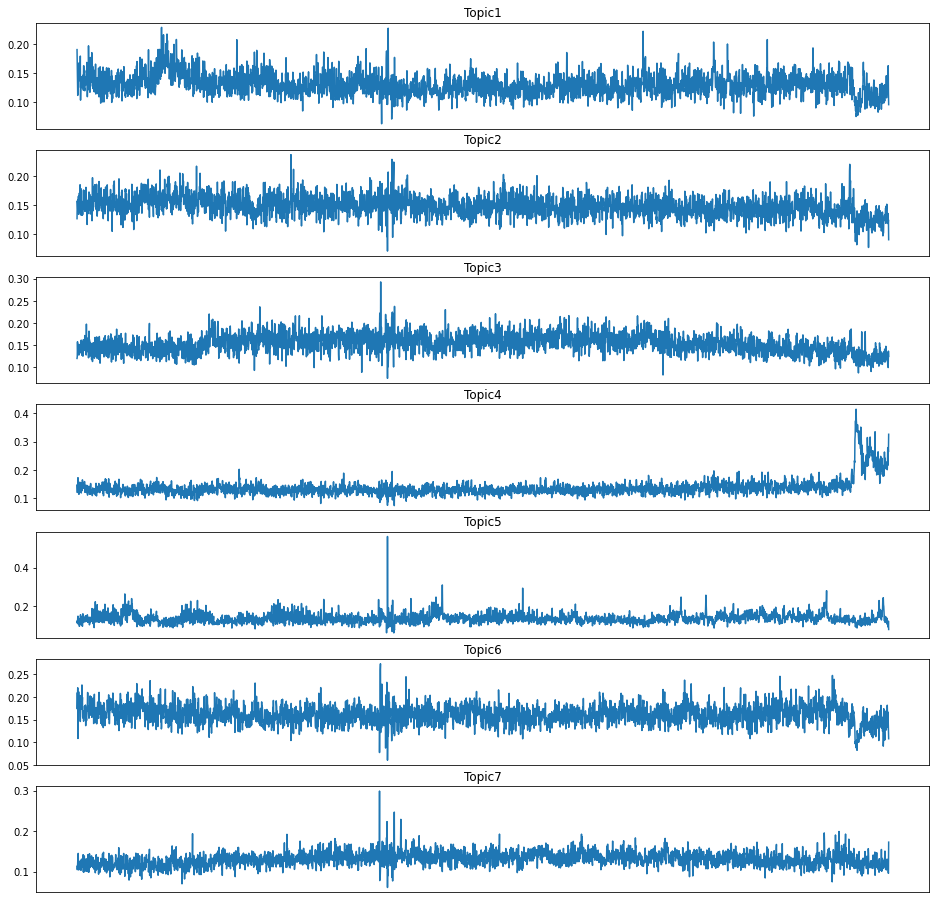

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7,1,sharex='col',figsize=(16,16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)
  ax.plot(trend[col])
plt.show()

## 청원 데이터 준비

* 청원 데이터: https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv
* 출처: https://github.com/akngs/petitions

In [53]:
!wget https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv

--2022-08-09 07:56:59--  https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.148.40
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.148.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24480914 (23M) [text/csv]
Saving to: ‘petition_sampled.csv’

petition_sampled.cs 100%[===================>]  23.35M  9.13MB/s    in 2.6s    

2022-08-09 07:57:03 (9.13 MB/s) - ‘petition_sampled.csv’ saved [24480914/24480914]



In [54]:
import pandas as pd

df = pd.read_csv('petition_sampled.csv')
df


,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
...,...,...,...,...,...,...,...,...
18072,468520,2018-12-13,2019-01-12,0,9,정치개혁,자유당 의원정수 200명으로 줄이자,http://m.hani.co.kr/arti/politics/assembly/868...
18073,468529,2018-12-13,2019-01-12,0,48,외교/통일/국방,김정은 우상 숭배 단체 모두 처벌 청원...,솔직히 김정은이 남한에 온다고 특별히 달라지는 건 없지만...\n기약 없는 김정은의...
18074,468582,2018-12-13,2019-01-12,0,36,외교/통일/국방,외국인 배우자 초청 비자 불허한 영사 직권남용 규탄,주우즈베키스탄 담당 한국인 영사 정길수에게 여러 차례 전화를 시도를 하여도 연결이 ...
18075,468598,2018-12-13,2019-01-12,0,18,외교/통일/국방,남북통일 이루는것 보다 (박근혜.이명박) 전 대통령님 두 분 석방 통일을 시키는 것...,존경하는 문재인 대통령님\n남북통일을 빠르게 이루는 것 보다\n박근혜 전 대통령님과...


* 한국어 자연어 처리 konlpy 라이브러리와 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [55]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-08-09 07:57:44--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-08-09 07:57:45--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc62365cf55b047deead8be93b10.dl.dropboxusercontent.com/cd/0/get/BqrxQtTCqRODjm0ChHtCpajXAMYMtqSNAGK077j5j5uOy-_IZzHF3eGuEjHepy1BkKZxVOQe3v58QITMSr8xSZC4jhw01PmtLsx69DaOfullvLatDxiw3NcZl0zHHeawNSon_YL35C_DPZyWeoRCRa_1Wfcv3uEMwhwVjs0wvBjKSbdR2-l0WEIMpVsexXIGvqY/file?dl=1# [following]
--2022-08-09 07:57:45--  https://uc62365cf55b047deead8be93b10.dl.dropboxusercontent.com/cd/0/get/

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab

mecab = Mecab()

def tokenizer(doc):
  return [token for token in mecab.nouns(doc) if len(token)>1]
cv = CountVectorizer(tokenizer=tokenizer, max_df = 0.5, min_df = 5, max_features = 1000)
content_cv = cv.fit_transform(df.content)
print(content_cv.shape)
f_names = cv.get_feature_names_out()
print(f_names)

(18077, 1000)
['가격' '가구' '가능' '가상' '가슴' '가입' '가정' '가족' '가지' '가치' '가해자' '각종' '간호사' '갈등'
 '감독' '감사' '감소' '감시' '감정' '강남' '강요' '강제' '강화' '개발' '개선' '개월' '개인' '개정'
 '개혁' '거기' '거래' '거래소' '거리' '거부' '거주' '거짓' '거짓말' '걱정' '건가요' '건강' '건물' '건설'
 '건지' '건축' '걸로' '검사' '검찰' '검토' '겁니까' '겁니다' '게시판' '게임' '결과' '결국' '결론' '결정'
 '결혼' '경기' '경기도' '경력' '경상북도' '경우' '경쟁' '경제' '경찰' '경찰관' '경찰서' '경찰청' '경험'
 '계속' '계약' '계획' '고객' '고등학교' '고려' '고문' '고민' '고발' '고생' '고소' '고시' '고용' '고통'
 '공간' '공개' '공공' '공급' '공기' '공단' '공동' '공매도' '공무원' '공부' '공사' '공약' '공원' '공익'
 '공인' '공장' '공정' '공직자' '공평' '공항' '과거' '과정' '관계' '관계자' '관련' '관리' '관심' '광고'
 '광주' '교사' '교수' '교육' '교육부' '교체' '교통' '구매' '구분' '구성' '구속' '구역' '구입' '구조'
 '구청' '국가' '국내' '국당' '국민' '국방' '국정' '국제' '국토' '국회' '국회의원' '군대' '군사' '군인'
 '권력' '권리' '권익' '권한' '규모' '규정' '규제' '그걸' '그것' '그게' '그동안' '그때' '근거' '근로'
 '근로자' '근무' '근본' '금리' '금액' '금융' '금지' '급여' '기간' '기관' '기능' '기대' '기록' '기본'
 '기사' '기술' '기억' '기업' '기자' '기존' '기준' '기초' '기타' '기회' '기획' '김정은' '나라' '나머지'
 '나이' '나중' '난민' '남녀' '남북' '남성' '남자' '남편' 

In [61]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components = 15, n_jobs=-1, random_state=123)
content_topics = lda_model.fit_transform(content_cv)
n_top_words=20
for idx, topic in enumerate(lda_model.components_):
  print("Topic:",idx)
  print([(f_names[i],topic[i].round(3)) for i in topic.argsort()[:-n_top_words-1:-1]])

Topic: 0
[('차량', 1112.541), ('문제', 1111.78), ('생각', 1055.228), ('사고', 1021.192), ('사용', 969.227), ('경우', 947.106), ('안전', 801.34), ('사람', 696.225), ('외국인', 694.579), ('시험', 657.927), ('이용', 648.858), ('때문', 615.615), ('게임', 601.383), ('필요', 587.673), ('가능', 558.946), ('정부', 549.098), ('운전', 543.023), ('기사', 525.91), ('이상', 520.508), ('제도', 504.014)]
Topic: 1
[('시간', 2395.704), ('근무', 1326.66), ('직원', 1038.062), ('불법', 1011.703), ('회사', 880.437), ('근로자', 851.133), ('장애', 824.264), ('업체', 819.502), ('조직', 779.591), ('계약', 697.741), ('근로', 670.069), ('업무', 620.302), ('사찰', 605.48), ('운영', 523.619), ('지급', 471.944), ('사람', 427.13), ('이상', 424.353), ('수당', 407.512), ('경우', 383.503), ('관리', 378.583)]
Topic: 2
[('아이', 4445.091), ('학교', 1559.541), ('교사', 1444.953), ('부모', 966.861), ('공무원', 909.671), ('엄마', 814.912), ('어린이집', 803.522), ('선생', 724.341), ('유치원', 677.067), ('생각', 615.116), ('일반', 557.327), ('교육', 541.529), ('초등', 505.593), ('시간', 502.717), ('행정', 469.611), ('보육', 434.066), ('아빠', 

* 혼란도(Perplexity) 계산

In [62]:
perplexity_values = []
min_topics = 20
max_topics= 30
for i in range(min_topics, max_topics):
  lda=LatentDirichletAllocation(n_components=i,doc_topic_prior=1.0, topic_word_prior=0.1, n_jobs=-1, random_state=123)
  lda.fit(content_cv)
  perplexity_values.append(lda.perplexity(content_cv))


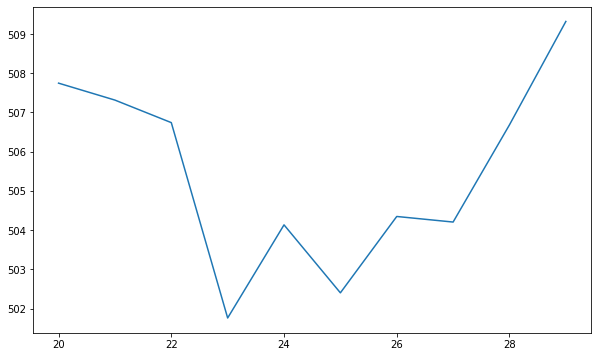

In [63]:
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(10,6))
plt.plot(x,perplexity_values)

In [65]:
lda_model = LatentDirichletAllocation(n_components = 23, n_jobs=-1, random_state=123)
content_topics = lda_model.fit_transform(content_cv)
n_top_words=20
for idx, topic in enumerate(lda_model.components_):
  print("Topic:",idx)
  print([(f_names[i],topic[i].round(3)) for i in topic.argsort()[:-n_top_words-1:-1]])

Topic: 0
[('사고', 1052.142), ('외국인', 804.035), ('안전', 741.849), ('게임', 668.777), ('운전', 580.757), ('생각', 488.184), ('경우', 459.751), ('정부', 444.686), ('도로', 429.153), ('버스', 429.024), ('문화', 403.967), ('음주운전', 368.604), ('한국', 362.153), ('차량', 357.782), ('사이트', 347.279), ('사람', 343.772), ('문제', 332.817), ('면허', 312.151), ('단속', 292.447), ('때문', 273.58)]
Topic: 1
[('불법', 1324.307), ('조직', 933.974), ('차량', 881.092), ('장애', 821.779), ('업체', 818.472), ('이용', 652.272), ('사찰', 612.043), ('주차', 486.437), ('관리', 471.269), ('제품', 410.016), ('국민', 365.109), ('판매', 361.042), ('사용', 327.867), ('서비스', 313.749), ('방법', 308.865), ('시설', 288.191), ('자동차', 285.954), ('감시', 285.806), ('설치', 270.585), ('운영', 270.455)]
Topic: 2
[('아이', 3891.548), ('학교', 1830.509), ('교사', 1452.14), ('선생', 883.41), ('교육', 857.658), ('어린이집', 803.32), ('부모', 704.929), ('유치원', 677.043), ('엄마', 606.27), ('초등', 541.417), ('일반', 519.099), ('생각', 479.54), ('행정', 471.725), ('공무원', 438.26), ('보육', 433.874), ('수업', 376.4), ('학부모', 344.

In [72]:
content_cv

<18077x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 431712 stored elements in Compressed Sparse Row format>

In [68]:
trend_data = pd.DataFrame(content_topics, columns=['Topic'+str(i) for i in range(1,24)])
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])],axis=1)
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,...,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,start
0,0.000242,0.526063,0.000242,0.000242,0.000242,0.043113,0.158017,0.207060,0.000242,0.000242,...,0.000242,0.000242,0.000242,0.061400,0.000242,0.000242,0.000242,0.000242,0.000242,2017-08
1,0.000630,0.000630,0.000630,0.066151,0.000630,0.000630,0.000630,0.000630,0.190870,0.000630,...,0.000630,0.000630,0.000630,0.000630,0.000630,0.000630,0.000630,0.000630,0.000630,2017-08
2,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.170301,0.001208,0.001208,...,0.001208,0.001208,0.001208,0.001208,0.001208,0.804337,0.001208,0.001208,0.001208,2017-08
3,0.153890,0.018929,0.000142,0.000142,0.000142,0.301972,0.000142,0.000142,0.000142,0.000142,...,0.000142,0.015562,0.000142,0.000142,0.000142,0.057352,0.000142,0.062268,0.015218,2017-08
4,0.134348,0.049879,0.000340,0.000340,0.000340,0.103268,0.000340,0.026770,0.059544,0.000340,...,0.000340,0.087012,0.029591,0.000340,0.000340,0.096063,0.000340,0.408769,0.000340,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,2018-12
18073,0.000887,0.000887,0.000887,0.000887,0.000887,0.432880,0.000887,0.000887,0.000887,0.155596,...,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.201626,0.000887,2018-12
18074,0.134840,0.000489,0.000489,0.000489,0.020498,0.000489,0.219791,0.144414,0.000489,0.000489,...,0.223642,0.000489,0.000489,0.000489,0.000489,0.000489,0.000489,0.000489,0.124116,2018-12
18075,0.001976,0.001976,0.001976,0.001976,0.001976,0.808429,0.001976,0.001976,0.001976,0.001976,...,0.001976,0.150069,0.001976,0.001976,0.001976,0.001976,0.001976,0.001976,0.001976,2018-12


In [69]:
trend = trend_data.groupby(['start']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,...,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23
start,,,,,,,,,,,,,,,,,,,,,
2017-08,0.021173,0.036169,0.139605,0.016511,0.036180,0.062138,0.036204,0.038697,0.042991,0.012464,...,0.008218,0.031830,0.014454,0.007039,0.038124,0.020351,0.065305,0.066046,0.048211,0.071428
2017-09,0.020614,0.015931,0.058802,0.014957,0.016913,0.034318,0.024472,0.015783,0.025860,0.023704,...,0.012469,0.043018,0.027498,0.008949,0.016314,0.018847,0.034628,0.045427,0.037828,0.023526
2017-10,0.030977,0.028766,0.045803,0.025319,0.034340,0.055894,0.032269,0.030636,0.039606,0.051037,...,0.022178,0.055896,0.045202,0.013797,0.037784,0.036096,0.076236,0.063823,0.049299,0.049029
2017-11,0.031271,0.022004,0.029210,0.034698,0.043675,0.232057,0.051493,0.026097,0.023524,0.035295,...,0.017005,0.037654,0.089775,0.013836,0.018942,0.018834,0.047058,0.047604,0.041128,0.022290
2017-12,0.045570,0.044626,0.053376,0.035470,0.031974,0.051694,0.047598,0.028175,0.040668,0.020646,...,0.035199,0.045675,0.042636,0.021319,0.036709,0.032231,0.051105,0.064687,0.067866,0.043845
2018-01,0.025200,0.022600,0.022702,0.028248,0.023833,0.079609,0.037986,0.016046,0.022255,0.015481,...,0.174865,0.026633,0.026270,0.010679,0.056607,0.055420,0.032233,0.043307,0.114072,0.025942
2018-02,0.030533,0.024683,0.027162,0.087341,0.020356,0.093550,0.066643,0.016786,0.024634,0.015277,...,0.028194,0.034700,0.028447,0.016067,0.030332,0.064204,0.041570,0.052009,0.116603,0.032595
2018-03,0.037514,0.037336,0.036831,0.032254,0.035822,0.059708,0.081242,0.019065,0.037165,0.023098,...,0.022864,0.049779,0.035588,0.015555,0.032004,0.037102,0.069768,0.055644,0.094085,0.034699
2018-04,0.037138,0.028919,0.032527,0.047993,0.029884,0.067704,0.071390,0.022517,0.034630,0.020336,...,0.071447,0.038851,0.020535,0.018667,0.038387,0.031960,0.043450,0.053293,0.110047,0.035342


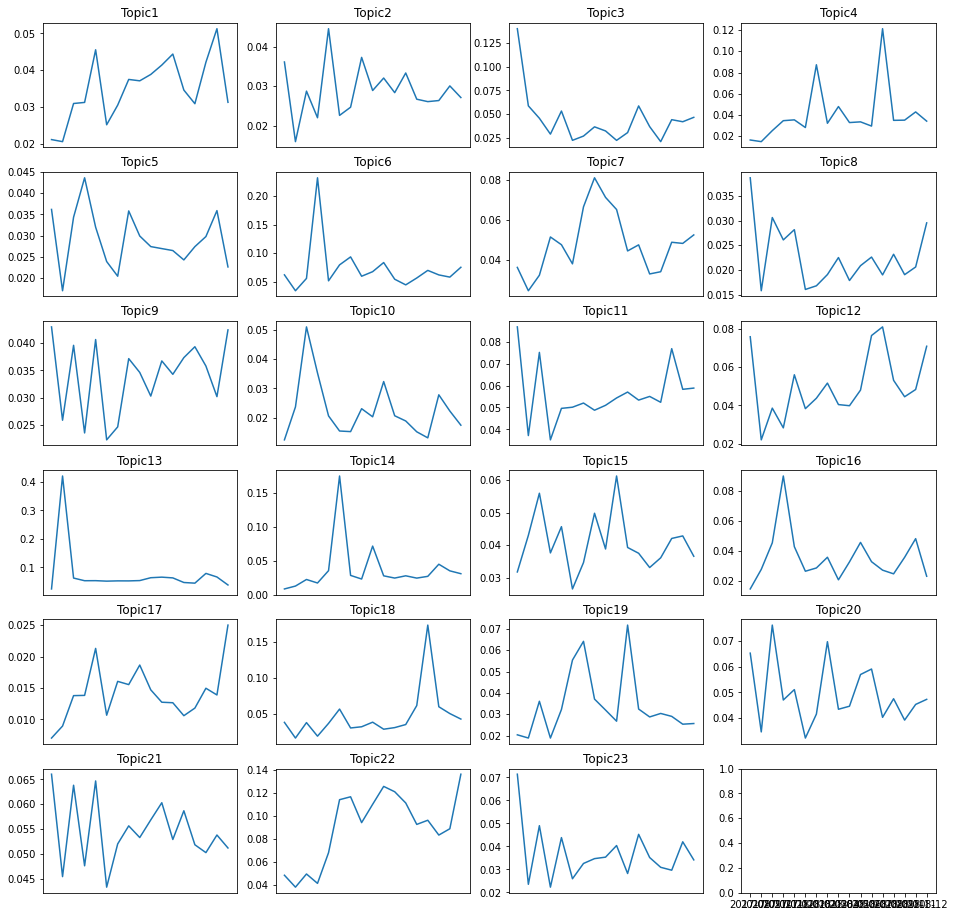

In [70]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6,4, sharex='col', figsize=(16,16))
for col,ax in zip(trend.columns.tolist(), axes.ravel()):
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)
  ax.plot(trend[col])
plt.show()


# BERTopic

* 신경망 토픽 모델링(Neural topic modeling)
* https://arxiv.org/pdf/2203.05794.pdf